IMPORT LIBRARIES

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
# import visuals as vs
from IPython.display import display
import seaborn as sns
%matplotlib inline

C:\Users\nukul\AppData\Local\Temp\ipykernel_26196\3528461139.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas  as pd


IMPORT DATASETS

In [3]:
data = pd.read_csv('winequality-white.csv', sep = ';')
display(data.head(n =5))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
data.shape[0]

4898

RATINGS: MORE THAN 7
         LOWER THAN 5
         BTW 5&6
         

In [9]:
n_wines = data.shape[0]

qualityabove_6 = data.loc[(data['quality']>6)]
n_above_6 = qualityabove_6.shape[0]

qualitylower_5 = data.loc[(data['quality']<5)]
n_lower_5 = qualitylower_5.shape[0]

qualitybtw_5 = data.loc[(data['quality']>=5)& (data['quality']<=6)]
n_btw_5 = qualitybtw_5.shape[0]

greaterper = n_above_6*100/n_wines

print("Total number of wine data:{}".format(n_wines))
print("Wines with rating 7 and above:{}".format(n_above_6))
print("Wines with less then 5:{}".format(n_lower_5))
print("Wines with rating 5 and 6:{}".format(n_btw_5))
print("Percentage of wines with quality 7 and above:{:.2f}%".format(greaterper))

display(np.round(data.describe()))

Total number of wine data:4898
Wines with rating 7 and above:1060
Wines with less then 5:183
Wines with rating 5 and 6:3655
Percentage of wines with quality 7 and above:21.64%


fixed acidity  volatile acidity  citric acid  residual sugar  \
count         4898.0            4898.0       4898.0          4898.0   
mean             7.0               0.0          0.0             6.0   
std              1.0               0.0          0.0             5.0   
min              4.0               0.0          0.0             1.0   
25%              6.0               0.0          0.0             2.0   
50%              7.0               0.0          0.0             5.0   
75%              7.0               0.0          0.0            10.0   
max             14.0               1.0          2.0            66.0   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count     4898.0               4898.0                4898.0   4898.0  4898.0   
mean         0.0                 35.0                 138.0      1.0     3.0   
std          0.0                 17.0                  42.0      0.0     0.0   
min          0.0                  2.0                   9.0      1.0     3.0   
25%          0.0                 23.0                 108.0      1.0     3.0   
50%          0.0                 34.0                 134.0      1.0     3.0   
75%          0.0                 46.0                 167.0      1.0     3.0   
max          0.0                289.0                 440.0      1.0     4.0   

       sulphates  alcohol  quality  
count     4898.0   4898.0   4898.0  
mean         0.0     11.0      6.0  
std          0.0      1.0      1.0  
min          0.0      8.0      3.0  
25%          0.0     10.0      5.0  
50%          0.0     10.0      6.0  
75%          1.0     11.0      6.0  
max          1.0     14.0      9.0

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

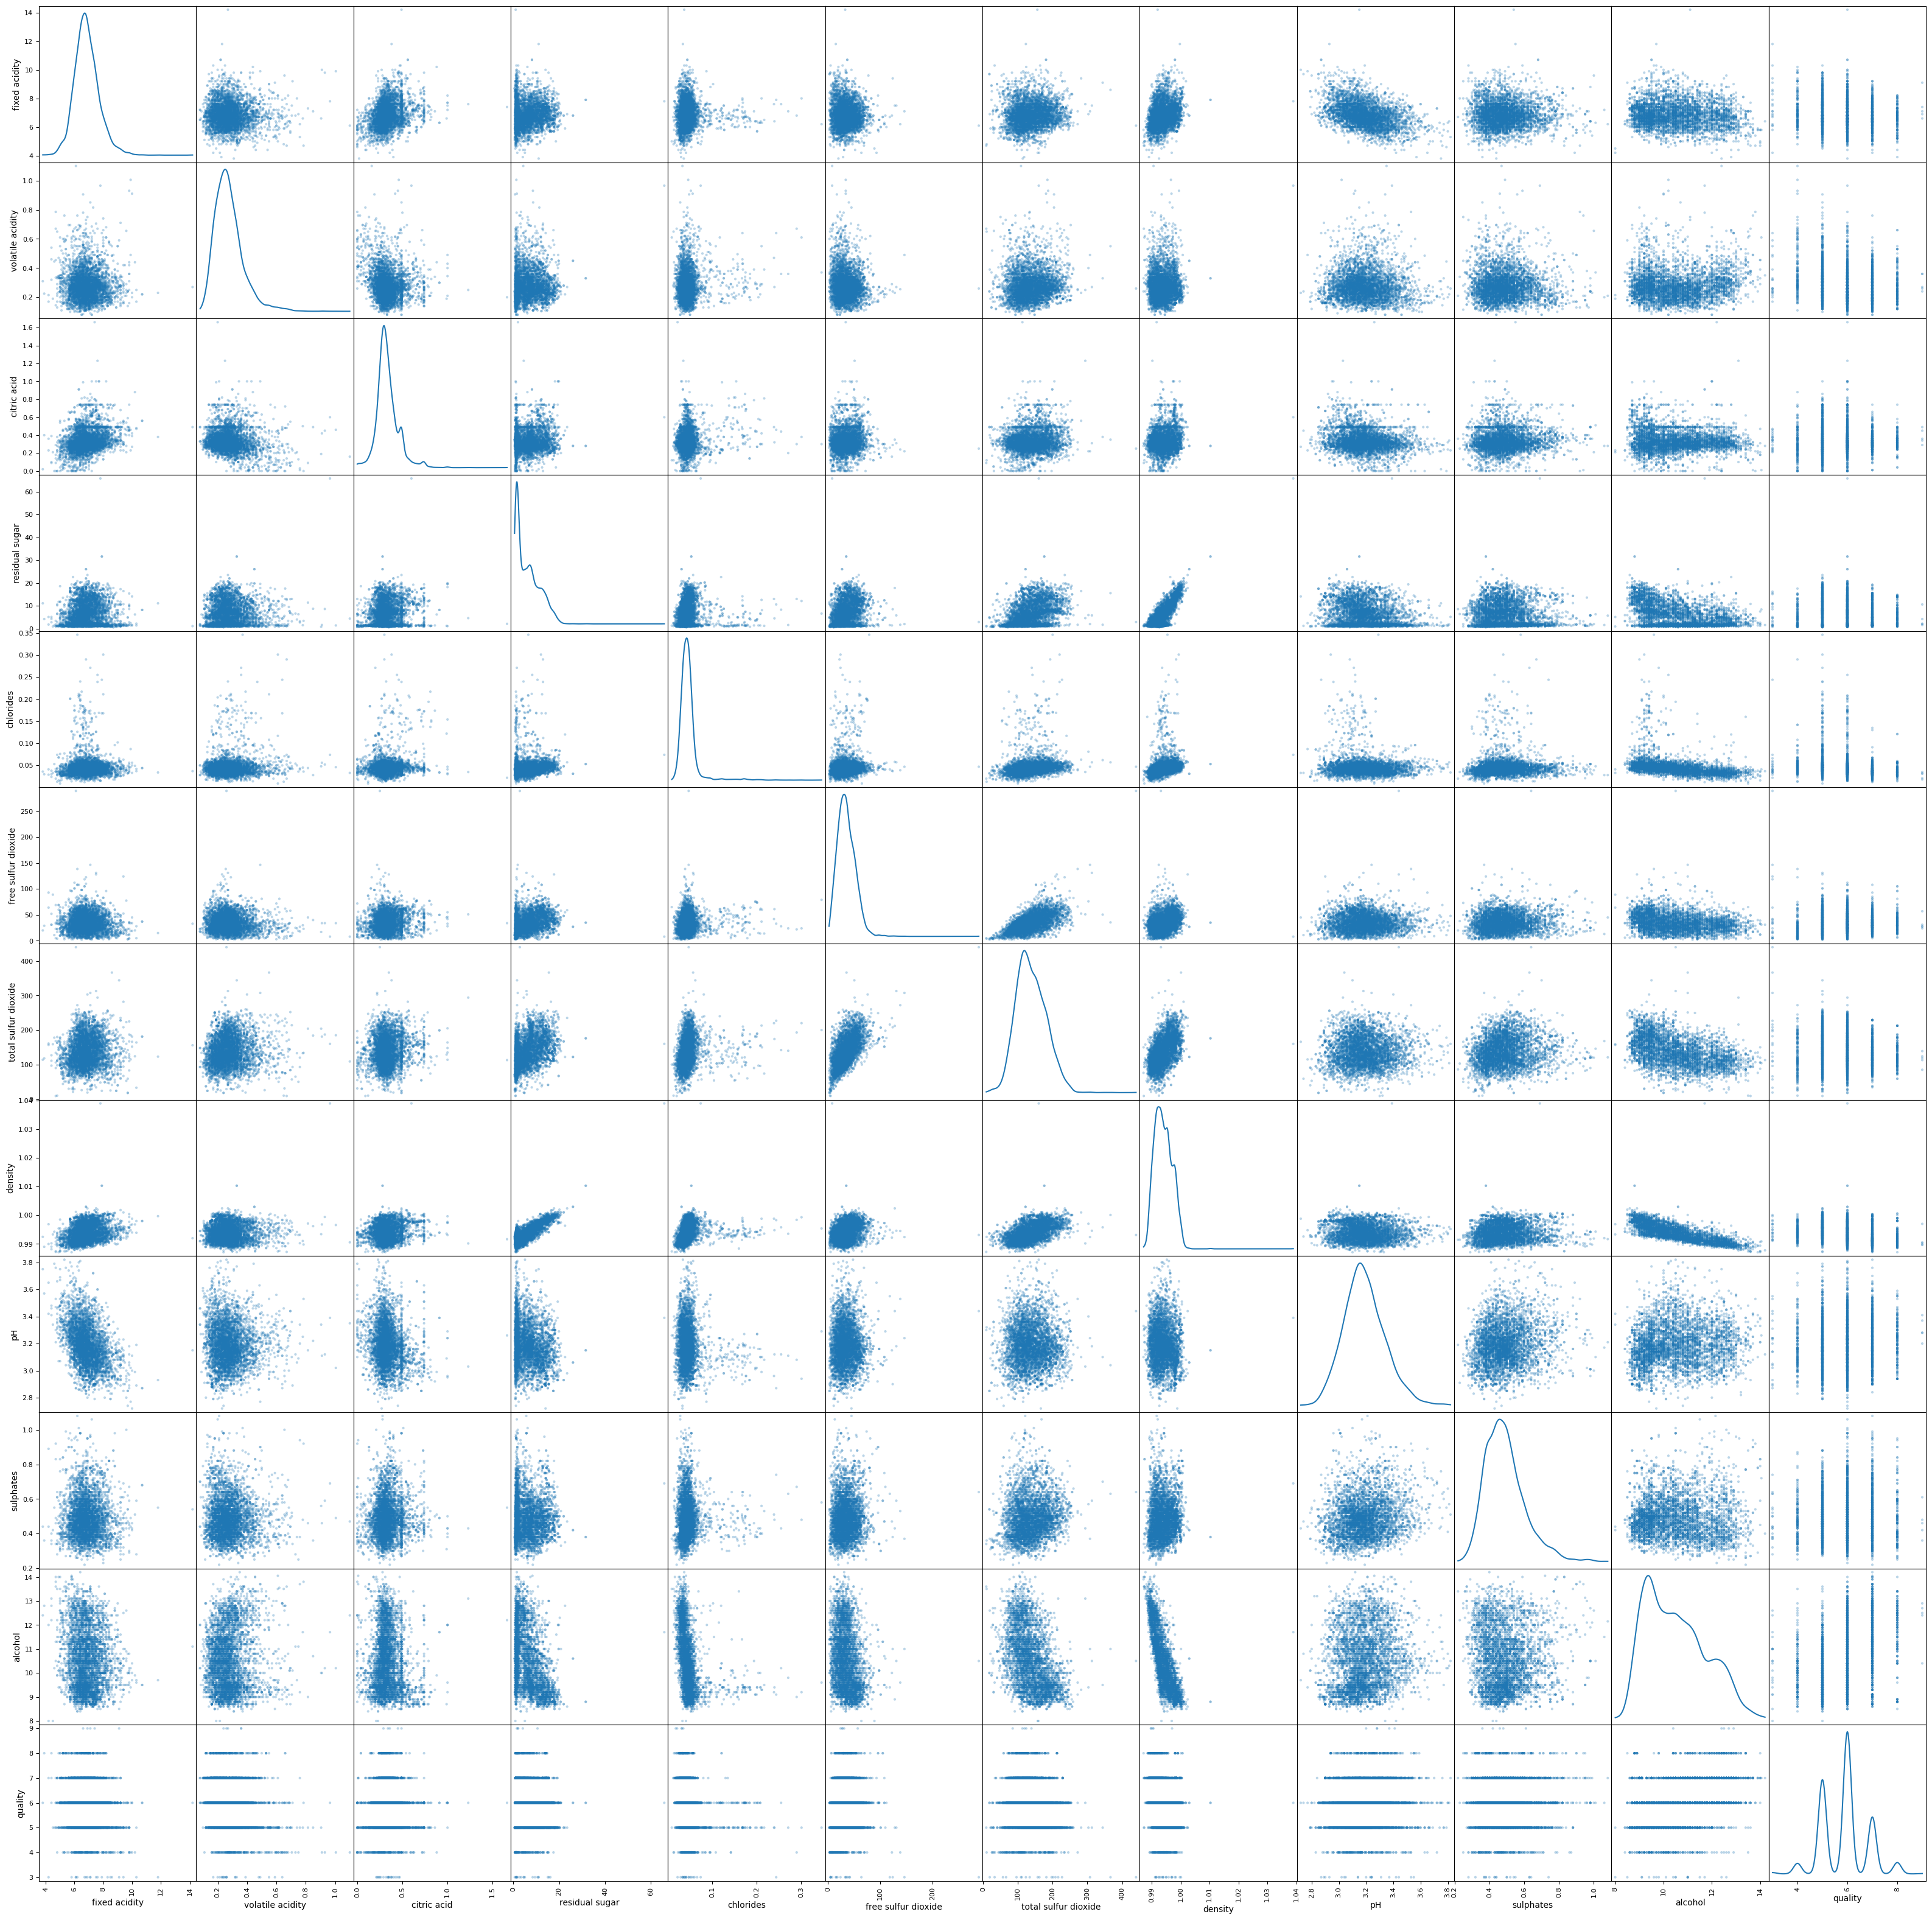

In [15]:
pd.plotting.scatter_matrix(data,alpha = 0.3, figsize = (40,40),diagonal = 'kde')

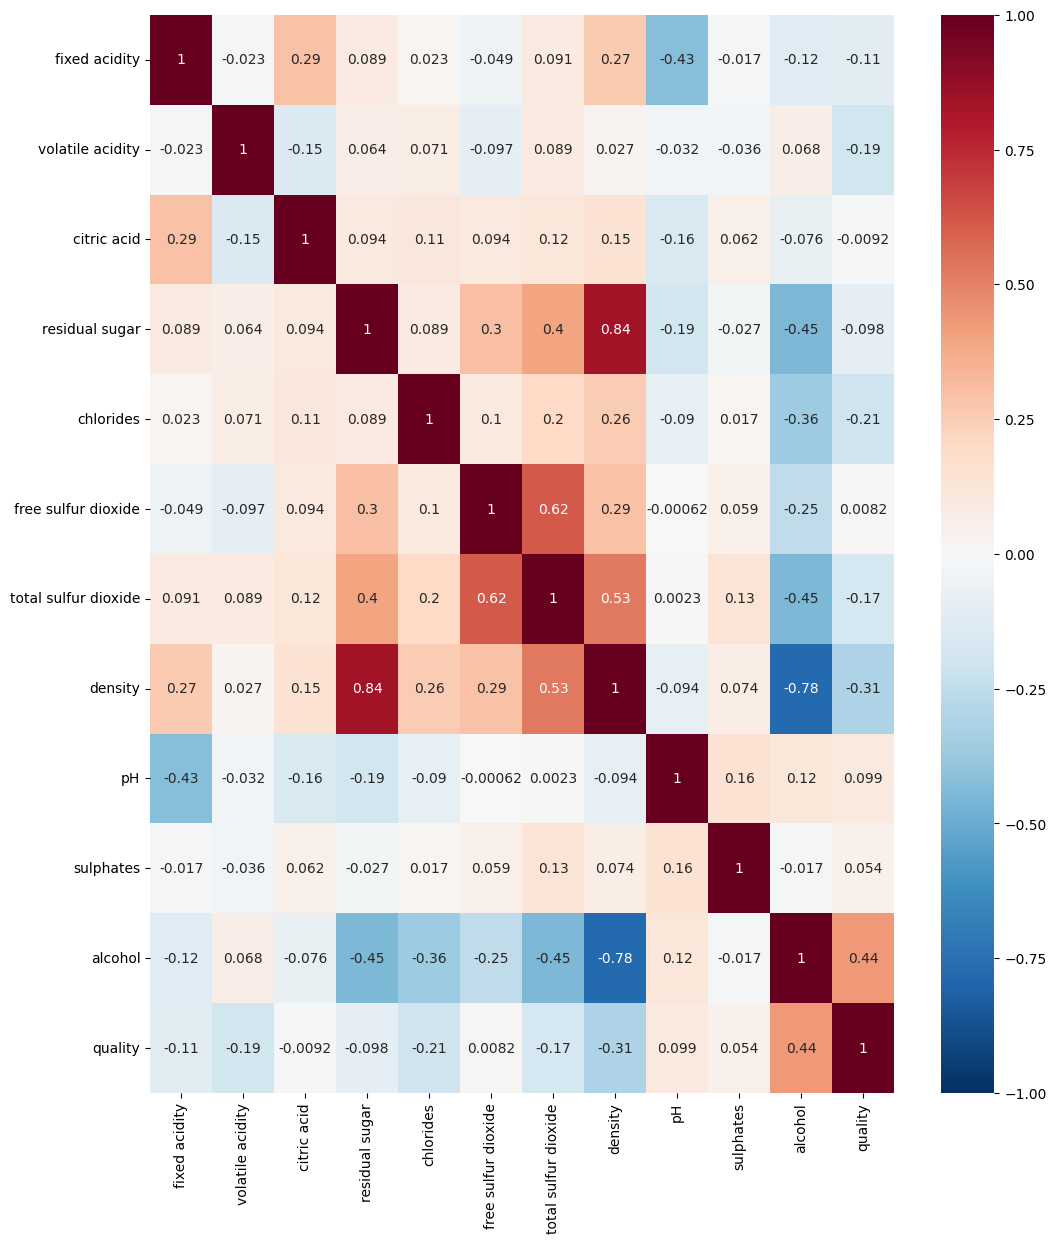

In [17]:
correlation = data.corr()
plt.figure(figsize=(12,14))
heatmap = sns.heatmap(correlation,annot = True, linewidths=0,  vmin = -1, cmap = 'RdBu_r' )

fixedAcidity Vs Quality

c:\Users\nukul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
c:\Users\nukul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1892: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

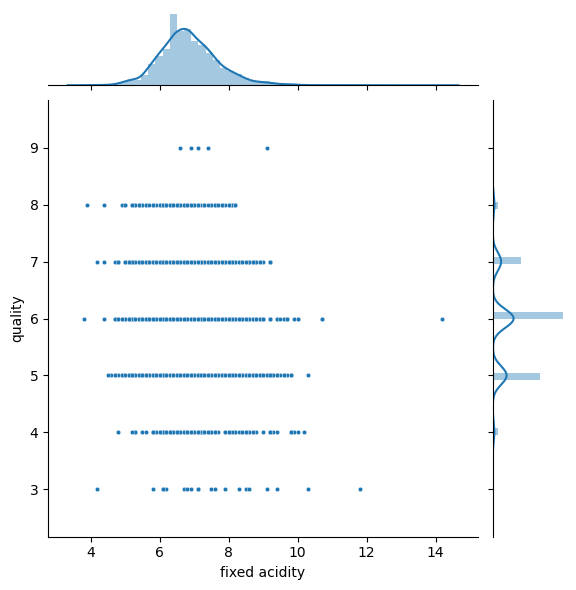

In [25]:
fixedAcidity_qualiTY = data[['fixed acidity', 'quality']]

g = sns.JointGrid(x = "fixed acidity", y = "quality", data = fixedAcidity_qualiTY)
g.plot_joint(sns.scatterplot, s = 10)
# g.plot_joint(sns.regplot, scatter_kws = {"s":10})
g= g.plot_marginals(sns.distplot)

ALCOHAL Vs QUALITY

c:\Users\nukul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
c:\Users\nukul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1892: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

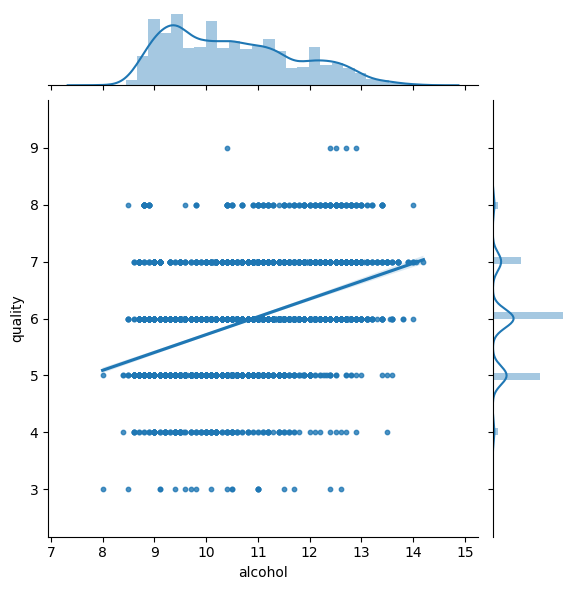

In [27]:
alcoHol_qualiTy = data[['alcohol', 'quality']]

g = sns.JointGrid(x = "alcohol", y = "quality", data = alcoHol_qualiTy)
g.plot_joint(sns.regplot, scatter_kws = {"s": 10})
g.plot_marginals(sns.distplot)

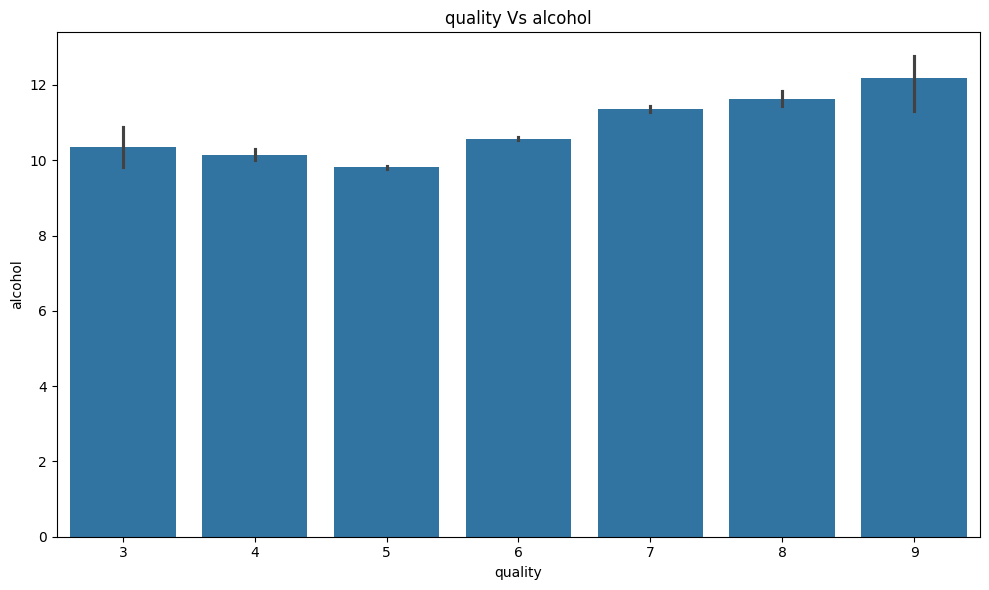

<Figure size 640x480 with 0 Axes>

In [28]:
fig , axs = plt.subplots(ncols=1,figsize=(10,6))
data= quality_alcohol = data[['quality','alcohol' ]]
sns.barplot(x='quality', y = 'alcohol', data= quality_alcohol, ax = axs)
plt.title("quality Vs alcohol")

plt.tight_layout()
plt.show()
plt.gcf().clear()